# Part 1: Option Valuation

## Ex. 1: Binomial tree program to approximate the price of the option. 
How does your estimate compare to the analytical value? <br>
Experiment for different values of the volatility

In [1]:
import math
from scipy.stats import norm
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20
steps = 50
T = 1 # maturity time in years

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)


''' The bionomial tree. ''' 
def binomial_tree(steps, start):
    ''' Binomial tree to approximate the price of the option. ''' 
    # Result includes stock price [0], option price [1], delta [2]
    results = [[[start, 0, 0]]]
    
    for i in range(steps): 
        result = []
        for j in range(len(results[-1])):
            # calculate the stock price [0]
            if j == 0:
                result.append([results[-1][j][0] * d, 0, 0])
            result.append([results[-1][j][0] * u, 0, 0])
        results.append(result)  
   
    return results


''' Approximate value with the european price call. ''' 
def call_option(S, K):
    ''' Calculates the value of a call option at its expiration date. '''
    return max(0, S - K)

def risk_neutral_valuation(r, dt, fi, fj, p): 
    ''' Risk-neutral valuation of the option. '''
    return math.exp(-r * dt) * (p * fi + (1 - p)*fj)

def price_EU_call(treelist, strike_price, p):
    ''' The price of the European call. '''
    lentree = len(treelist)
    
    # calculate the option prices [1]
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
    
    # calculate risk neutral valuation: back in time [1]
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is ????
            treelist[i][j][1] = risk_neutral_valuation(interest_rate, 1/(len(treelist)-1), treelist[i+1][j+1][1], treelist[i+1][j][1], p)
   
    return treelist


'''Analytical value'''
def black_scholes(stock_price, strike_price, interest_rate, volatility, T):
    d1 = (math.log(stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
    #d2 = d1 - volatility* math.sqrt(T)
    d2 = (math.log(stock_price / strike_price) + (interest_rate - (volatility ** 2) / 2) * T) / (volatility * math.sqrt(T))
   
    call = stock_price * norm.cdf(d1) - strike_price * math.exp(- interest_rate * T) * norm.cdf(d2)
    put = strike_price * math.exp(-interest_rate * T ) * norm.cdf(-d2) - stock_price * norm.cdf(-d1)

    return call, put

In [3]:
''' The estimate compared to the analytical value '''
treelist = binomial_tree(steps, stock_price)
filled_tree = price_EU_call(treelist, strike_price, p)

#The estimate 
estimated_price = filled_tree[0][0][1]
print('The estimated price of the option:', estimated_price)

#The analytical value
analytical_call, analytical_put = black_scholes(stock_price, strike_price, interest_rate, volatility, T)
print('The analytical price of the option:', analytical_call)


The estimated price of the option: 11.546434850755034
The analytical price of the option: 11.544280227051097


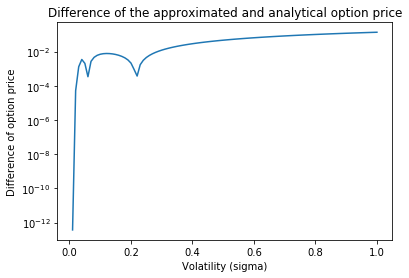

In [4]:
''' Different values of volatility '''
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

volatility = np.linspace(0.01,1,100)
estimated_prices = []
analytical_prices = []
for i in volatility: 
    
    u = math.exp(i * math.sqrt(1/steps))
    d = math.exp(-i * math.sqrt(1/steps))
    a = math.exp(interest_rate * 1/steps)
    p = (a - d) / (u - d)
    
    #print(i)
    
    treelist = binomial_tree(steps, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)

    # Estimated  and analytical price
    estimated_prices.append(filled_tree[0][0][1])
    analytical_prices.append(black_scholes(stock_price, strike_price, interest_rate, i, T)[0])
    
#plt.plot(range(len(estimated_prices)), estimated_prices, label ='Estimated price')
#plt.plot(range(len(analytical_prices)), analytical_prices, label ='Analytical price')
plt.plot(volatility, [abs(analytical_prices[i] - estimated_prices[i]) for i in range(len(analytical_prices))])

plt.title('Difference of the approximated and analytical option price')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Difference of option price')
plt.yscale('log')
# plt.legend(loc = 'best')
plt.show()

## Ex. 2: Convergence of the method
What is the computational complexity of this algorithm? <br>
Done <br> 
Study the convergence of the method for increasing number of steps in the tree.

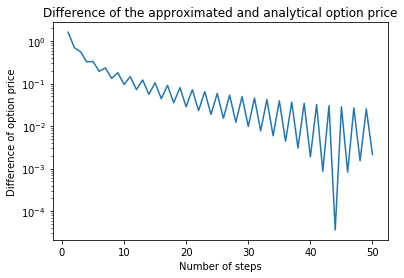

In [5]:
import matplotlib.pyplot as plt
import numpy as np

stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20

T = 1 # maturity time in years
plt.figure()

steps = np.linspace(1,50)
estimated_prices = []
analytical_prices = []
for step in steps: 
    step = int(step)
    #print(step)
    u = math.exp(volatility * math.sqrt(1/step))
    d = math.exp(-volatility * math.sqrt(1/step))
    a = math.exp(interest_rate * 1/step)
    p = (a - d) / (u - d)
    
    treelist = binomial_tree(step, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)

    # Estimated rmand analytical price
    estimated_prices.append(filled_tree[0][0][1])
    analytical_prices.append(black_scholes(stock_price, strike_price, interest_rate, volatility, T)[0])
    
#plt.plot(range(len(estimated_prices)), estimated_prices, label ='Estimated price')
#plt.plot(range(len(analytical_prices)), analytical_prices, label ='Analytical price')
plt.plot(steps, [abs(analytical_prices[i] - estimated_prices[i]) for i in range(len(analytical_prices))])

plt.title('Difference of the approximated and analytical option price')
plt.xlabel('Number of steps')
plt.ylabel('Difference of option price')
plt.yscale('log')
# plt.legend(loc = 'best')
plt.show()

In [7]:
'''Computational complexity'''
import matplotlib.pyplot as plt
import numpy as np
import time

stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
volatility = 0.20

T = 1 # maturity time in years
plt.figure()

steps = np.linspace(1,500,50S)
estimated_prices = []
analytical_prices = []
comp_times = []

print(steps)
comp_times_list = []
for iteration in range(2):
    for step in steps: 

        start = time.time()

        step = int(step)
        u = math.exp(volatility * math.sqrt(1/step))
        d = math.exp(-volatility * math.sqrt(1/step))
        a = math.exp(interest_rate * 1/step)
        p = (a - d) / (u - d)

        treelist = binomial_tree(step, stock_price)
        filled_tree = price_EU_call(treelist, strike_price, p)

        # Estimated  and analytical price
        estimated_prices.append(filled_tree[0][0][1])
        analytical_prices.append(black_scholes(stock_price, strike_price, interest_rate, volatility, T)[0])

        end = time.time()
        comp_times.append(end - start)
    comp_times_list.append(comp_times)


[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

<Figure size 432x288 with 0 Axes>

In [8]:
sorted_list = []
full_sorted_list = []
for i in range(500):
    for sample in comp_times_list:
        sorted_list.append(sample[i])
    full_sorted_list.append(np.mean(sorted_list))

No handles with labels found to put in legend.


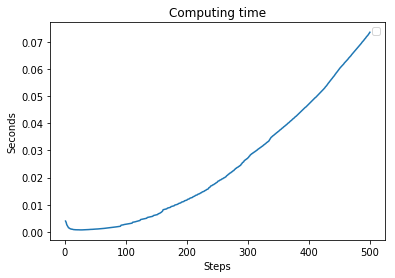

In [9]:
#Computing time
plt.plot(steps, full_sorted_list)
plt.title('Computing time')
plt.xlabel('Steps')
plt.ylabel('Seconds')
plt.legend(loc = 'best')
plt.show()

## Ex. 3: Hedge parameter
Compare with the analytical values. 
Experiment for different values of the volatility.

In [10]:
''' The estimation of delta. '''
def estimate_delta(treelist):
    lentree = len(treelist)
    
    for i in range(len(treelist) - 2, -1, -1): # i is time
        for j in range(len(treelist[i])): # j is ????
            treelist[i][j][2] = (treelist[i+1][j+1][1] - treelist[i+1][j][1]) / (treelist[i+1][j+1][0] - treelist[i+1][j][0])
 
    return treelist
            
#SAME CALCULATIOIN, DIFFERENT METHOD TO ESTIMATE THE DELTA
def calc_delta(treelist):
    lentree = len(treelist)
    for j in range(lentree - 1):
        for k in range(len(treelist[-(j+2)])):
            treelist[-(j+2)][k][2] = (treelist[-(j+1)][k][1] - treelist[-(j+1)][k+1][1]) / (treelist[-(j+1)][k][0] - treelist[-(j+1)][k+1][0])
#             if j == 0 and k ==0:
#                 print(treelist[-(j+1)][k][1], treelist[-(j+1)][k+1][1], treelist[-(j+2)][k][1])
    return treelist


''' The analytical delta. '''
def analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps):
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * T*(1-t/steps)) / (volatility * math.sqrt(T*(1-t/steps)))
    return norm.cdf(d1) 

In [11]:
steps = 50

''' The estimate compared to the analytical value. '''
# The estimate 
estimated_deltas = estimate_delta(filled_tree)
print(estimated_deltas[0])

b = calc_delta(filled_tree)
print(b[0])

# The analytical
current_stock_price = 100
t = 0
anal_delta = analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps)
#  d1 = (math.log(b[t][20][0] / strike_price) + (interest_rate + (volatility ** 2) / 2) * T*(1-t/steps) / (volatility * math.sqrt(T*(1-t/steps))))
# print(norm.cdf(d1))

print(anal_delta)


[[100.0, 11.547481290156679, 0.6735945558344401]]
[[100.0, 11.547481290156679, 0.6735945558344401]]
0.6737355117348961


In [12]:
list_estimated_deltas = []
list_anal_deltas = []
steps = 365
stock_price = 100.
strike_price = 99.0
interest_rate = 0.06
# volatility = 0.20

T = 1 # maturity time in years
t = 0

for i in range(1,50):
    #Estimated deltas
    u = math.exp(i * math.sqrt(1/steps))
    d = math.exp(-i * math.sqrt(1/steps))
    a = math.exp(interest_rate * 1/steps)
    p = (a - d) / (u - d)

    treelist = binomial_tree(steps, stock_price)
    filled_tree = price_EU_call(treelist, strike_price, p)
    
    estimated_deltas = estimate_delta(filled_tree)
    list_estimated_deltas.append(estimated_deltas[0][0][2])
#     print(list_estimated_deltas)


    #Analytical deltas
    t = 0
    anal_deltas = analytical_delta(stock_price, strike_price, interest_rate, i, T, t, steps)
    list_anal_deltas.append(anal_deltas)
    
    print(estimated_deltas[0][0][2])
    print(anal_deltas)
    print(i)
    print('')
   
    
    
# plt.plot(list_estimated_deltas[-1], label = 'approximated delta')
# plt.plot(list_anal_deltas, label = 'analytical delta')

volatility = np.linspace(0,1,len(list_anal_deltas))
plt.plot(volatility, [abs(list_anal_deltas[i] - list_estimated_deltas[i]) for i in range(len(list_anal_deltas))])
plt.title('Difference of the approximated and analytical deltas')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Difference of deltas')
plt.yscale('log')
# plt.legend(loc = 'best')
plt.show()

0.7157388522307266
0.7156782208205362
1

0.8497634303380381
0.8496714211660529
2

0.9361922898887
0.936164431937323
3

0.9781543982982647
0.9781789754287795
4

0.9940002794629812
0.9940316486776197
5

0.9986834038962595
0.9987009472513865
6

0.9997697136309779
0.9997759527121108
7

0.9999679304608217
0.9999694803153918
8

0.9999964444786438
0.9999967245795536
9

0.9999996859149207
0.9999997235825909
10

0.9999999778602856
0.9999999816844024
11

0.9999999987521055
0.9999999990482663
12

0.9999999999435945
0.9999999999612535
13

0.9999999999979349
0.9999999999987651
14

0.9999999999999283
0.9999999999999692
15

0.9999999999999818
0.9999999999999994
16

1.0000000000000036
1.0
17

0.9999999999999903
1.0
18

0.9999999999999782
1.0
19

0.9999999999999937
1.0
20

1.0000000000000082
1.0
21

0.9999999999999698
1.0
22

0.9999999999999732
1.0
23

0.9999999999999555
1.0
24

1.0000000000000213
1.0
25

1.0000000000000013
1.0
26

0.9999999999999782
1.0
27

0.9999999999999627
1.0
28

0.999999999999961

ZeroDivisionError: float division by zero

## Ex. 4: American option 
What is the value of the American put and call for the corresponding parameters? <br>
Experiment for different values of the volatility.

In [54]:
''' American call option. ''' 
def price_US_call(treelist, strike_price, p):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = call_option(el[0], strike_price)
        
    for i in range(lentree - 1):
        for j in range(len(treelist[-(i+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/(len(treelist)-1), treelist[-(i+1)][j+1][1], treelist[-(i+1)][j][1], p)
            use_now_value = call_option(treelist[-(i+2)][j][0], strike_price)
            if keeping_value < use_now_value:
                print("Hoi")
            print(i, j, keeping_value, use_now_value)
            
            treelist[-(i+2)][j][1] = max(keeping_value, use_now_value)

    return treelist


''' American put option. ''' 
def put_option(S, K ): 
    ''' Calculates the value of a put option at its expiration date. '''
    return max(0, K - S)

def price_US_put(treelist, strike_price, p):
    lentree = len(treelist)
    for el in treelist[-1]:
        el[1] = put_option(el[0], strike_price)
        
    for i in range(lentree - 1):
        for j in range(len(treelist[-(i+2)])):
            keeping_value = risk_neutral_valuation(interest_rate, 1/steps, treelist[-(i+1)][j+1][1], treelist[-(i+1)][j][1], p)
            use_now_value = put_option(treelist[-(i+2)][j][0], strike_price)
            
            print(i, j, keeping_value, use_now_value)
            treelist[-(i+2)][j][1] = max(keeping_value, use_now_value)

    return treelist
    

In [57]:
''' The American put and call option. '''

stock_price = 105
strike_price = 1
interest_rate = -0.1
volatility = 0.5
steps = 100
T = 1 # maturity time in years

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)

treelist = binomial_tree(steps, stock_price)

treelist2 = binomial_tree(steps, stock_price)
call_US = price_US_call(treelist, strike_price, p)
call_EU = price_EU_call(treelist2, strike_price, p)

print(call_US[-10][0])
print('The American call option: ', call_US[0][0][1])
print('The European call option:', call_EU[0][0][1])
# Call is altijd meer waard dan een put 


0 0 0.0 0
0 1 0.0 0
0 2 0.0 0
0 3 0.02650105475135165 0.003968202707069324
Hoi
0 4 0.10855596013782144 0.10955646030452981
Hoi
0 5 0.22524903172481472 0.22624953189152297
Hoi
0 6 0.35421482078367933 0.35521532095038766
Hoi
0 7 0.49674406027821516 0.49774456044492355
Hoi
0 8 0.6542632307430153 0.6552637309097236
Hoi
0 9 0.8283488369801129 0.8293493371468212
Hoi
0 10 1.0207431862489218 1.0217436864156304
Hoi
0 11 1.233371825862898 1.2343723260296064
Hoi
0 12 1.4683628147142525 1.4693633148809608
Hoi
0 13 1.7280680216026079 1.7290685217693156
Hoi
0 14 2.015086663528437 2.0160871636951456
Hoi
0 15 2.3322913195304316 2.3332918196971404
Hoi
0 16 2.682856680422027 2.6838571805887352
Hoi
0 17 3.0702913221641115 3.07129182233082
Hoi
0 18 3.49847282087252 3.499473321039228
Hoi
0 19 3.9716865609030987 3.9726870610698066
Hoi
0 20 4.494668624418705 4.4956691245854135
Hoi
0 21 5.072653191691344 5.073653691858053
Hoi
0 22 5.711424926537603 5.7124254267043115
Hoi
0 23 6.417376871178417 6.4183773713451

4 78 2216.1101638666096 2216.1111643667764
Hoi
4 79 2449.285780498832 2449.286780998999
Hoi
4 80 2706.984690805121 2706.985691305287
Hoi
4 81 2991.7860320954155 2991.7870325955823
Hoi
4 82 3306.540191918386 3306.5411924185532
Hoi
4 83 3654.3973356980687 3654.398336198235
Hoi
4 84 4038.8389346482318 4038.839935148399
Hoi
4 85 4463.712609506455 4463.713610006622
Hoi
4 86 4933.270638815691 4933.271639315858
Hoi
4 87 5452.2125171571715 5452.213517657338
Hoi
4 88 6025.731989271727 6025.732989771894
Hoi
4 89 6659.56903080283 6659.570031302996
Hoi
4 90 7360.06729590211 7360.068296402277
Hoi
4 91 8134.237606652279 8134.238607152442
Hoi
4 92 8989.828119730952 8989.829120231117
Hoi
4 93 9935.401872566927 9935.402873067089
Hoi
4 94 10980.422485096891 10980.423485597059
Hoi
4 95 12135.348874854613 12135.349875354781
5 0 0.028569253143575262 0
5 1 0.08152765426159043 0.055442753186526916
5 2 0.17051933910854689 0.16644463651544328
Hoi
5 3 0.2881201896554793 0.28912068982218764
Hoi
5 4 0.42369819611

8 19 6.417376871178417 6.418377371345126
Hoi
8 20 7.197574429954393 7.198574930121101
Hoi
8 21 8.059826082267218 8.060826582433927
Hoi
8 22 9.01276153246603 9.013762032632739
Hoi
8 23 10.065918078829078 10.066918578995784
Hoi
8 24 11.229836066050506 11.230836566217215
Hoi
8 25 12.516164376552775 12.517164876719482
Hoi
8 26 13.937777016417257 13.938777516583961
Hoi
8 27 15.508901962764233 15.509902462930942
Hoi
8 28 17.245263562130077 17.246264062296788
Hoi
8 29 19.16423990501253 19.16524040517924
Hoi
8 30 21.285036751641382 21.28603725180809
Hoi
8 31 23.628879749682124 23.629880249848835
Hoi
8 32 26.219226867651983 26.220227367818683
Hoi
8 33 29.082003170153342 29.08300367032005
Hoi
8 34 32.245860284633984 32.246860784800695
Hoi
8 35 35.742463156504726 35.74346365667143
Hoi
8 36 39.60680696255606 39.60780746272277
Hoi
8 37 43.87756735444976 43.87856785461646
Hoi
8 38 48.59748753764003 48.59848803780673
Hoi
8 39 53.81380605974019 53.8148065599069
Hoi
8 40 59.57872958978462 59.5797300899

11 71 1561.3708306114888 1561.3718311116556
Hoi
11 72 1725.6869104650325 1725.6879109651993
Hoi
11 73 1907.284263291365 1907.2852637915316
Hoi
11 74 2107.9803764345497 2107.9813769347165
Hoi
11 75 2329.7838840512177 2329.7848845513845
Hoi
11 76 2574.9146701963296 2574.9156706964964
Hoi
11 77 2845.826086168928 2845.827086669095
Hoi
11 78 3145.2295044765388 3145.2305049767056
Hoi
11 79 3476.121455162548 3476.1224556627144
Hoi
11 80 3841.8136160860463 3841.814616586213
Hoi
11 81 4245.9659573069375 4245.966957807103
Hoi
11 82 4692.62337129645 4692.624371796616
Hoi
11 83 5186.256155580535 5186.257156080702
Hoi
11 84 5731.804752980013 5731.805753480177
Hoi
11 85 6334.729197222877 6334.730197723044
Hoi
11 86 7001.063758797014 7001.06475929718
Hoi
11 87 7737.477337957438 7737.478338457604
Hoi
11 88 8551.340209321537 8551.341209821703
Hoi
12 0 0.3549575670327711 0.35521532095038766
Hoi
12 1 0.49674406027821505 0.4977445604449233
Hoi
12 2 0.6542632307430151 0.6552637309097233
Hoi
12 3 0.82834883

Hoi
17 39 84.9657285730217 84.9667290731884
Hoi
17 40 94.0069283936094 94.00792889377611
Hoi
17 41 103.9989994998337 104.00000000000041
Hoi
17 42 115.04194589777674 115.04294639794347
Hoi
17 43 127.24628910665166 127.24728960681836
Hoi
17 44 140.73417429531423 140.73517479548093
Hoi
17 45 155.64059275216735 155.64159325233405
Hoi
17 46 172.1147329233475 172.1157334235142
Hoi
17 47 190.32147354083756 190.32247404100428
Hoi
17 48 210.44303378423425 210.4440342844009
Hoi
17 49 232.68079699154342 232.6817974917101
Hoi
17 50 257.25732617131405 257.2583266714807
Hoi
17 51 284.41859148803417 284.41959198820086
Hoi
17 52 314.43643201421 314.4374325143766
Hoi
17 53 347.6112763871721 347.6122768873388
Hoi
17 54 384.27514959985547 384.2761501000221
Hoi
17 55 424.79499601852586 424.79599651869256
Hoi
17 56 469.5763518853318 469.57735238549833
Hoi
17 57 519.0674040613222 519.0684045614888
Hoi
17 58 573.7634756311913 573.764476131358
Hoi
17 59 634.211983263195 634.2129837633618
Hoi
17 60 701.0179159

22 64 1343.7448966794584 1343.745897179625
Hoi
22 65 1485.1730572643 1485.1740577644666
Hoi
22 66 1641.4753473395995 1641.4763478397663
Hoi
22 67 1814.2160927594448 1814.2170932596116
Hoi
22 68 2005.1241409641668 2005.1251414643336
Hoi
22 69 2216.1101638666096 2216.1111643667764
Hoi
22 70 2449.285780498832 2449.286780998999
Hoi
22 71 2706.98469080512 2706.9856913052863
Hoi
22 72 2991.7860320954146 2991.7870325955814
Hoi
22 73 3306.540191918384 3306.5411924185496
Hoi
22 74 3654.3973356980646 3654.3983361982314
Hoi
22 75 4038.838934648227 4038.839935148394
Hoi
22 76 4463.712609506449 4463.713610006615
Hoi
22 77 4933.270638815684 4933.271639315851
Hoi
23 0 1.3479305447306817 1.3489310448973901
Hoi
23 1 1.5949697792189306 1.595970279385639
Hoi
23 2 1.8679903567990142 1.8689908569657225
Hoi
23 3 2.1697247591767392 2.170725259343447
Hoi
23 4 2.5031928456675354 2.5041933458342434
Hoi
23 5 2.871732076963498 2.872732577130206
Hoi
23 6 3.2790309175617507 3.280031417728458
Hoi
23 7 3.729165751156

27 53 573.7634756311913 573.764476131358
Hoi
27 54 634.211983263195 634.2129837633618
Hoi
27 55 701.0179159391594 701.0189164393261
Hoi
27 56 774.8498898875547 774.8508903877215
Hoi
27 57 856.4468403194402 856.4478408196069
Hoi
27 58 946.6254169404201 946.6264174405868
Hoi
27 59 1046.2881572553836 1046.2891577555504
Hoi
27 60 1156.4325194672067 1156.4335199673733
Hoi
27 61 1278.160865373704 1278.1618658738707
Hoi
27 62 1412.6914931750175 1412.6924936751843
Hoi
27 63 1561.3708306114888 1561.3718311116554
Hoi
27 64 1725.6869104650325 1725.687910965199
Hoi
27 65 1907.2842632913646 1907.2852637915314
Hoi
27 66 2107.9803764345497 2107.9813769347156
Hoi
27 67 2329.783884051217 2329.7848845513836
Hoi
27 68 2574.914670196328 2574.9156706964936
Hoi
27 69 2845.826086168925 2845.827086669092
Hoi
27 70 3145.229504476535 3145.2305049767015
Hoi
27 71 3476.1214551625435 3476.1224556627103
Hoi
27 72 3841.8136160860417 3841.8146165862086
Hoi
28 0 2.015086663528435 2.0160871636951434
Hoi
28 1 2.33229131

33 30 76.78491267141389 76.7859131715806
Hoi
33 31 84.96572857302165 84.96672907318836
Hoi
33 32 94.00692839360934 94.00792889377603
Hoi
33 33 103.99899949983362 104.00000000000031
Hoi
33 34 115.0419458977766 115.04294639794327
Hoi
33 35 127.24628910665146 127.24728960681816
Hoi
33 36 140.73417429531395 140.73517479548062
Hoi
33 37 155.640592752167 155.64159325233373
Hoi
33 38 172.11473292334716 172.11573342351386
Hoi
33 39 190.32147354083722 190.32247404100391
Hoi
33 40 210.44303378423388 210.44403428440054
Hoi
33 41 232.68079699154296 232.6817974917097
Hoi
33 42 257.25732617131365 257.2583266714804
Hoi
33 43 284.4185914880338 284.4195919882005
Hoi
33 44 314.43643201420963 314.4374325143763
Hoi
33 45 347.6112763871718 347.6122768873385
Hoi
33 46 384.2751495998551 384.2761501000218
Hoi
33 47 424.79499601852547 424.7959965186921
Hoi
33 48 469.5763518853316 469.5773523854983
Hoi
33 49 519.0674040613221 519.0684045614888
Hoi
33 50 573.7634756311913 573.764476131358
Hoi
33 51 634.211983263

39 43 384.27514959985507 384.27615010002177
Hoi
39 44 424.7949960185254 424.7959965186921
Hoi
39 45 469.5763518853316 469.5773523854983
Hoi
39 46 519.0674040613221 519.0684045614888
Hoi
39 47 573.7634756311913 573.764476131358
Hoi
39 48 634.211983263195 634.2129837633615
Hoi
39 49 701.0179159391591 701.0189164393258
Hoi
39 50 774.8498898875545 774.8508903877212
Hoi
39 51 856.44684031944 856.4478408196065
Hoi
39 52 946.6254169404198 946.6264174405865
Hoi
39 53 1046.2881572553833 1046.2891577555501
Hoi
39 54 1156.4325194672065 1156.4335199673726
Hoi
39 55 1278.1608653737032 1278.1618658738698
Hoi
39 56 1412.6914931750166 1412.692493675183
Hoi
39 57 1561.370830611487 1561.3718311116538
Hoi
39 58 1725.6869104650307 1725.687910965197
Hoi
39 59 1907.2842632913623 1907.2852637915291
Hoi
39 60 2107.980376434547 2107.981376934714
Hoi
40 0 4.494668624418699 4.495669124585406
Hoi
40 1 5.072653191691336 5.073653691858044
Hoi
40 2 5.711424926537593 5.712425426704302
Hoi
40 3 6.417376871178406 6.418

46 37 299.05236689646625 299.05336739663295
Hoi
46 38 330.6092550172597 330.6102555174265
Hoi
46 39 365.4850100333277 365.4860105334944
Hoi
46 40 404.0286802230168 404.0296807231835
Hoi
46 41 446.62602359256044 446.627024092727
Hoi
46 42 493.7033686718625 493.70436917202926
Hoi
46 43 545.7318813537191 545.7328818538858
Hoi
46 44 603.232280480437 603.2332809806037
Hoi
46 45 666.7800493730281 666.7810498731947
Hoi
46 46 737.0111954617117 737.0121959618785
Hoi
46 47 814.6286156620472 814.6296161622137
Hoi
46 48 900.4091312035152 900.4101317036819
Hoi
46 49 995.2112623174819 995.2122628176486
Hoi
46 50 1099.9838205962324 1099.9848210963992
Hoi
46 51 1215.7754050182934 1215.77640551846
Hoi
46 52 1343.7448966794566 1343.7458971796232
Hoi
46 53 1485.173057264298 1485.1740577644648
Hoi
47 0 6.797725212338355 6.798725712505063
Hoi
47 1 7.617924355342673 7.6189248555093805
Hoi
47 2 8.524384595221614 8.52538509538832
Hoi
47 3 9.526178090727692 9.527178590894401
Hoi
47 4 10.63333112787836 10.63433

54 33 299.0523668964662 299.05336739663284
Hoi
54 34 330.6092550172596 330.6102555174263
Hoi
54 35 365.4850100333275 365.4860105334942
Hoi
54 36 404.0286802230166 404.02968072318333
Hoi
54 37 446.62602359256033 446.627024092727
Hoi
54 38 493.7033686718625 493.70436917202926
Hoi
54 39 545.731881353719 545.7328818538856
Hoi
54 40 603.2322804804368 603.2332809806035
Hoi
54 41 666.7800493730276 666.7810498731942
Hoi
54 42 737.0111954617113 737.012195961878
Hoi
54 43 814.6286156620469 814.6296161622134
Hoi
54 44 900.4091312035149 900.4101317036815
Hoi
54 45 995.2112623174814 995.2122628176483
Hoi
55 0 10.633331127878357 10.634331628045066
Hoi
55 1 11.856924466396404 11.85792496656311
Hoi
55 2 13.209204239677634 13.210204739844345
Hoi
55 3 14.703704518209987 14.704705018376695
Hoi
55 4 16.355382763099893 16.3563832632666
Hoi
55 5 18.180769525370447 18.18177002553716
Hoi
55 6 20.198133889272135 20.199134389438843
Hoi
55 7 22.427666315418453 22.428666815585157
Hoi
55 8 24.891680713702005 24.89

64 18 109.38246461931597 109.38346511948268
Hoi
64 19 120.99159498630321 120.99259548646991
Hoi
64 20 133.82166825204635 133.82266875221308
Hoi
64 21 148.00109210212557 148.00209260229224
Hoi
64 22 163.67177897630128 163.67277947646798
Hoi
64 23 180.99056637591008 180.99156687607677
Hoi
64 24 200.1307865462927 200.1317870464594
Hoi
64 25 221.2840012441645 221.28500174433123
Hoi
64 26 244.6619189520628 244.66291945222952
Hoi
64 27 270.49851372799776 270.4995142281644
Hoi
64 28 299.05236689646614 299.05336739663284
Hoi
64 29 330.6092550172596 330.61025551742625
Hoi
64 30 365.48501003332746 365.48601053349415
Hoi
64 31 404.02868022301647 404.02968072318316
Hoi
64 32 446.6260235925601 446.62702409272686
Hoi
64 33 493.7033686718623 493.704369172029
Hoi
64 34 545.7318813537187 545.7328818538853
Hoi
64 35 603.2322804804363 603.2332809806031
Hoi
65 0 18.180769525370437 18.181770025537148
Hoi
65 1 20.19813388927212 20.19913438943883
Hoi
65 2 22.42766631541844 22.428666815585142
Hoi
65 3 24.8916

83 5 76.78491267141371 76.78591317158042
Hoi
83 6 84.96572857302145 84.96672907318815
Hoi
83 7 94.00692839360912 94.00792889377581
Hoi
83 8 103.99899949983336 104.00000000000009
Hoi
83 9 115.0419458977764 115.04294639794311
Hoi
83 10 127.24628910665126 127.24728960681796
Hoi
83 11 140.73417429531378 140.73517479548048
Hoi
83 12 155.64059275216684 155.64159325233354
Hoi
83 13 172.11473292334693 172.11573342351366
Hoi
83 14 190.32147354083693 190.32247404100363
Hoi
83 15 210.44303378423353 210.44403428440023
Hoi
83 16 232.68079699154262 232.68179749170935
Hoi
84 0 48.59748753763985 48.598488037806554
Hoi
84 1 53.81380605973999 53.8148065599067
Hoi
84 2 59.578729589784416 59.57973008995112
Hoi
84 3 65.94995542011952 65.95095592028622
Hoi
84 4 72.99124892029823 72.99224942046494
Hoi
84 5 80.77308172233084 80.77408222249755
Hoi
84 6 89.3733370244644 89.37433752463112
Hoi
84 7 98.87808907240833 98.87908957257504
Hoi
84 8 109.38246461931591 109.38346511948262
Hoi
84 9 120.99159498630313 120.9

In [48]:
print(call_EU[-10][1000])

10* 1/2000

[104.10702011216718, 5.133746503941872, 0]


0.005

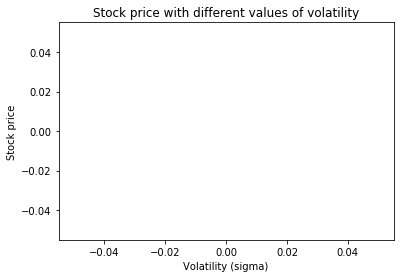

In [30]:
''' Different values of volatility. '''

plt.plot()
plt.title('Stock price with different values of volatility')
plt.xlabel('Volatility (sigma)')
plt.ylabel('Stock price')
plt.show()

# Part 2: Hedging Simulations

In [ ]:
stock_price = 100.0
strike_price = 99
interest_rate = 0.06
volatility = 0.2
stock_volatility = 0.1
T = 1
steps = 365

u = math.exp(volatility * math.sqrt(1/steps))
d = math.exp(-volatility * math.sqrt(1/steps))
a = math.exp(interest_rate * 1/steps)
p = (a - d) / (u - d)


def dynamics_stock_price(r, S, dt, sigma):
    ''' The dynamics of the stock price S. '''
    dZ = np.random.normal() * math.sqrt(dt)

    return S + r*S*dt + sigma * S * dZ


''' The analytical delta. '''
def analytical_delta(current_stock_price, strike_price, interest_rate, volatility, T, t, steps):
    #print((steps - t)/steps)
    d1 = (math.log(current_stock_price / strike_price) + (interest_rate + (volatility ** 2) / 2) * ((steps - t)/steps)) / (volatility * math.sqrt((steps - t)/steps))
    return norm.cdf(d1) 


stock_over_time = [stock_price]
anal_delta = []
for t in range(steps):
    stock_over_time.append(dynamics_stock_price(interest_rate, stock_over_time[t], T/steps, stock_volatility))
    anal_delta.append(analytical_delta(stock_over_time[t], strike_price, interest_rate, volatility, T, t, steps))

In [ ]:
call_prices = []
for i in range(steps):
    call, put = black_scholes(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))
    call_prices.append(call)

In [ ]:
#Plot of the stock price over time
plt.plot(stock_over_time)
plt.title('Stock price over time')
plt.xlabel('Time (t)')
plt.ylabel('Stock price')
plt.show()

plt.plot(call_prices)
plt.title('Call price over time')
plt.xlabel('Time (t)')
plt.ylabel('Call price')
plt.show()

plt.plot(anal_delta)
plt.show()

## VRAAG 1: Vary the frequency of the hedge adjustment (from daily to weekly) and explain the results

In [ ]:
hedgetime = 1 #1 OF 7 VERANDEREN EN DAAR PLOT VAN MAKEN - VERSCHIL VERKLAREN

money = []
call_value = []
delta_list = []
folio_price = []
interest_loss = 0
loss_per_time = []
for i in range(steps):
    if i == 0:
        call_value.append(call_prices[i])
        delta_list.append(anal_delta[i])
        folio_price.append(anal_delta[i] * stock_over_time[i])
        money.append(call_prices[i] - anal_delta[i] * stock_over_time[i])
    elif i%hedgetime == 0:
        call_value.append(call_prices[i])
        money.append(money[-1] * ((1 + interest_rate)**(hedgetime/steps)) - (anal_delta[i] - delta_list[-1]) * stock_over_time[i])
        interest_loss = interest_loss + money[-1] * (1 + interest_rate)**(hedgetime/steps) - money[-1]
        loss_per_time
        delta_list.append(anal_delta[i])
        folio_price.append(anal_delta[i] * stock_over_time[i])
        
#print(money)
#print(call_value)
#print(delta_list)
#print(folio_price)
money[-1] = money[-1] - max(0, stock_over_time[-1] - strike_price)
        

In [ ]:
total_worth = [money[i] + folio_price[i] for i in range(len(money))]
plt.plot(range(len(money)), money, label = "Money")
plt.plot(range(len(money)), call_value, label= "Option")
#plt.plot(range(len(money)), delta_list = "")
plt.plot(range(len(money)), folio_price, label = "Folio price")
plt.plot(range(len(money)), total_worth, label = "Total worth")

horiz_line_data = np.array([i for i in range(365)])
xs = [0 for i in range(365)]
plt.plot(horiz_line_data, xs) 

plt.legend()
plt.show()

In [ ]:
total_worth = [money[i] + folio_price[i] if i + 1 == len(money) else money[i] + folio_price[i] - max(0, stock_over_time[i] - strike_price) for i in range(len(money))]
plt.plot(range(len(money)), money, label = "Money")
plt.plot(range(len(money)), call_value, label= "Option")
#plt.plot(range(len(money)), delta_list = "")
plt.plot(range(len(money)), folio_price, label = "Folio price")
plt.plot(range(len(money)), total_worth, label = "Total worth")

horiz_line_data = np.array([i for i in range(365)])
xs = [0 for i in range(365)]
plt.plot(horiz_line_data, xs) 

plt.legend()
plt.show()

In [ ]:
end_change = []
stock_volatility = 0.1
volatility = 0.2
for i in range(1000):
    if i%100 == 0:
        print(i)
    stock_over_time = [stock_price]
    anal_delta = []
    for t in range(steps):
        stock_over_time.append(dynamics_stock_price(interest_rate, stock_over_time[t], T/steps, stock_volatility))
        anal_delta.append(analytical_delta(stock_over_time[t], strike_price, interest_rate, volatility, T, t, steps))
        
    call_prices = []
    for i in range(steps):
        call, put = black_scholes(stock_over_time[i], strike_price, interest_rate, volatility, T*(1-i/steps))
        call_prices.append(call)
        
    money = []
    call_value = []
    delta_list = []
    folio_price = []

    for i in range(steps):
        if i == 0:
            call_value.append(call_prices[i])
            delta_list.append(anal_delta[i])
            folio_price.append(anal_delta[i] * stock_over_time[i])
            money.append(call_prices[i] - anal_delta[i] * stock_over_time[i])
        elif i%hedgetime == 0:
            call_value.append(call_prices[i])
            money.append(money[-1] * (1 + interest_rate)**(hedgetime/steps) - (anal_delta[i] - delta_list[-1]) * stock_over_time[i])
            delta_list.append(anal_delta[i])
            folio_price.append(anal_delta[i] * stock_over_time[i])
        
    money[-1] = money[-1] - max(0, stock_over_time[-1] - strike_price)

    end_change.append(money[-1] + folio_price[-1])

print(end_change)

plt.hist(end_change)
plt.show()

In [ ]:
CI = stats.norm.interval(0.95, loc = np.mean(end_change), scale = np.std(end_change)) # TODO: check this
plt.axvline(CI[0], color = 'r')
plt.axvline(CI[1], color = 'r')
plt.hist(end_change, bins = 40)
plt.ylabel('Observations')
plt.xlabel('Profit/Loss')
plt.title('Profit or loss after hedging using stocks and a call option (new delta time = 1)')
plt.show()

In [ ]:
CI

In [ ]:
count = 0
for i in end_change:
    if i > 2.1131491370043816 or i < -1.9286610850368464:
        count = count + 1
print(count)

In [ ]:
np.mean(end_change)